# Data Management - Exisiting Values

**Learning Objective:** 
- Learn to clean and recode variables
- Learn to create new variables
- Learn to compare variables


In [24]:
# Load Pandas
import pandas as pd

# Import Data
data_url = "https://raw.githubusercontent.com/datamisc/ts-2020/main/data.csv"
anes_data  = pd.read_csv(data_url, compression='gzip')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15,17,18,19,21,22,23,25,26,27,29,30,31,33,34,35,37,38,1508,1509) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
# Subsetting & Renaming Variables
my_vars = [
    "V201033",  # vote_int
    "V201507x",  # age
    "V201200",  # liberal-conservative self-placement
    "V201151",	 # biden thrm
    "V201152",  # trump thrm
    "V201144x",  # covid 
]

df = anes_data[my_vars]

df.columns = ["vote_int", "age", "ideology", "biden_thrm", "trump_thrm", "covid"]
df.head()


,vote_int,age,ideology,biden_thrm,trump_thrm,covid
0,2,46,6,0,100,1
1,3,37,4,0,0,3
2,1,40,2,65,0,4
3,1,41,3,70,15,4
4,2,72,5,15,85,3


## Recoding Variables Using a Mask/Filter

We can use relational operators (<>=) to identify the observations that meet certain criteria that we want to change.

For instance we could recode the voting intention variable:

- [V201033](https://sda.berkeley.edu/sdaweb/docs/nes2020/DOC/hcbk0003.htm#V201033)



In [27]:
# Recoding values with a mask
new_df = df[(df['vote_int']>0) & (df['vote_int']<=5)].copy()  # Creating a new dataframe

# The recoding starts here
mask = new_df['vote_int'] == 1
new_df.loc[mask, "vote_int"] = "J.Biden"
mask = new_df['vote_int'] == 2
new_df.loc[mask, "vote_int"] = "D.Trump"


In [28]:
new_df['vote_int'].value_counts()


J.Biden    3759
D.Trump    3016
3           133
5            86
4            55
Name: vote_int, dtype: int64

### Hack-Time



In [29]:
# Finish recoding the `vote_int` variable


## Recoding Variables Using `replace()`

One can also recode variables using the `replace()` method!

Let's recode the `covid` variable this time using the `.replace()` method and dictionary!

- [V201144x](https://sda.berkeley.edu/sdaweb/docs/nes2020/DOC/hcbk0005.htm#V201144x)

In [30]:
# What does the covid variable look like?
new_df['covid'].value_counts()

 4    3903
 1    1888
 2     846
 3     401
-2      11
Name: covid, dtype: int64

In [31]:
# Creating two lists with the old and the new labels
old_labels = [-2, 1, 2, 3, 4]
new_labels = ["Don't Know", "1.Approve strongly", "2.Approve not strongly", "3.Disapprove not strongly", "4.Disapprove strongly"]


In [32]:
new_df['covid'].replace(old_labels, new_labels)


0              1.Approve strongly
1       3.Disapprove not strongly
2           4.Disapprove strongly
3           4.Disapprove strongly
4       3.Disapprove not strongly
                  ...            
8274           1.Approve strongly
8275           1.Approve strongly
8276       2.Approve not strongly
8277        4.Disapprove strongly
8279        4.Disapprove strongly
Name: covid, Length: 7049, dtype: object

In [33]:
new_df['covid'].replace(old_labels, new_labels).value_counts()

4.Disapprove strongly        3903
1.Approve strongly           1888
2.Approve not strongly        846
3.Disapprove not strongly     401
Don't Know                     11
Name: covid, dtype: int64

In [34]:
new_df['covid'] = new_df['covid'].replace(old_labels, new_labels)
new_df['covid'].value_counts(normalize=True)

4.Disapprove strongly        0.553696
1.Approve strongly           0.267839
2.Approve not strongly       0.120017
3.Disapprove not strongly    0.056888
Don't Know                   0.001561
Name: covid, dtype: float64

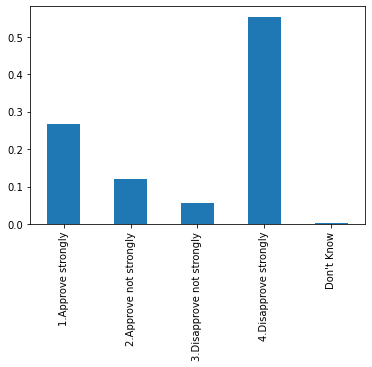

In [35]:
new_df['covid'].value_counts(normalize=True).sort_index().plot(kind='bar')


### Hack-Time

In [40]:
# Are citizens who approve the actions taken by the government to 
# handle covid more likely to liberal or conservative?
# TIP: use pd.crosstabs!


## Filtering or Recoding?

Until now, we have been filtering out observations that we don't need without thinking about the consequences they can have on our results. 

If you apply multiple filters, you add bias to your dataset but you might also end up loosing a big part of your data! 
- **With less data we have less evidence to draw conclusions!**

Let's try to predict the election outcome using pre-election data!

In [41]:
# Filtering Out ALL Observations that are note Biden or Trump
mask = df['vote_int'].between(1,2)
filter_df = df[mask].copy()

# Change Labels
vote_int_labels = {
    1: "J.Biden",
    2: "D.Trump",
}

filtered_output = filter_df['vote_int'].replace(vote_int_labels).value_counts(normalize=True)
filtered_output

J.Biden    0.554834
D.Trump    0.445166
Name: vote_int, dtype: float64

In [42]:
# Recoding Observations
mask = df["vote_int"] > 0
recoded_df = df[mask].copy()

# Keeping all other vote choice intentions coded as "Other"
mask = recoded_df["vote_int"] > 2
recoded_df.loc[mask, "vote_int"] = "Other"

# Recoding the remaining labels using the previously created dictionary
recoded_df["vote_int"] = recoded_df["vote_int"].replace(vote_int_labels)

recoded_output = recoded_df["vote_int"].value_counts(normalize=True)
recoded_output


J.Biden    0.526618
D.Trump    0.422527
Other      0.050855
Name: vote_int, dtype: float64

In [43]:
print("The Filtered Output")
print(filtered_output)
print("==============================")
print("The Recoded Output")
print(recoded_output)

The Filtered Output
J.Biden    0.554834
D.Trump    0.445166
Name: vote_int, dtype: float64
The Recoded Output
J.Biden    0.526618
D.Trump    0.422527
Other      0.050855
Name: vote_int, dtype: float64


# Creating New Variables (~ Adding New Columns)

When you recode variables you might want to add a new variable to the original dataset to keep the orignial version of your variable.

![](https://pandas.pydata.org/docs/_images/05_newcolumn_1.svg)




In [44]:
recoded_df

,vote_int,age,ideology,biden_thrm,trump_thrm,covid
0,D.Trump,46,6,0,100,1
1,Other,37,4,0,0,3
2,J.Biden,40,2,65,0,4
3,J.Biden,41,3,70,15,4
4,D.Trump,72,5,15,85,3
...,...,...,...,...,...,...
8274,D.Trump,54,6,0,85,1
8275,D.Trump,26,99,0,100,1
8276,D.Trump,52,6,50,70,2
8277,J.Biden,45,4,70,30,4


In [45]:
recoded_df['my_new_var'] = 0
recoded_df

,vote_int,age,ideology,biden_thrm,trump_thrm,covid,my_new_var
0,D.Trump,46,6,0,100,1,0
1,Other,37,4,0,0,3,0
2,J.Biden,40,2,65,0,4,0
3,J.Biden,41,3,70,15,4,0
4,D.Trump,72,5,15,85,3,0
...,...,...,...,...,...,...,...
8274,D.Trump,54,6,0,85,1,0
8275,D.Trump,26,99,0,100,1,0
8276,D.Trump,52,6,50,70,2,0
8277,J.Biden,45,4,70,30,4,0


# Hack-Time

In [46]:
# Add a new binary variable that takes the value 1 when
# the respondent intends to vote for Trump. 
# Name this variable `vote_trump`


Let's now add a categorical age variable to our dataset!


In [20]:
# But how?
mask = recoded_df['age'] >= 18
recoded_df['age_cat'] = "18-35"
mask = recoded_df['age'] >= 36 
recoded_df['age_cat'] = "36-50"
mask = recoded_df['age'] >= 51
recoded_df['age_cat'] = "51-65"
...
...
...
# This is very tedious...

KeyError: ignored

## The cut function
The `pd.cut()` function allows us to convert a continuous variable into a discrete variable !

In [21]:
recoded_df["age_cat"] = pd.cut(df["age"], bins=[17,35,50,65,80], labels=["18-35", "36-50", "51-65", "66+"])
recoded_df


KeyError: ignored

In [ ]:
recoded_df['age_cat'].value_counts().sort_index().plot(kind='bar')


In [ ]:
pd.crosstab(recoded_df['vote_int'], recoded_df['age_cat'], normalize=True).plot(kind='bar', subplots=True, figsize=(10,10), layout=(2,2));

### Hack-Time

In [ ]:
# Add a `clean_covid` variable to the recoded_df

# Let's plot

# Let's use feelings thermometers to measure polarization



![](https://pandas.pydata.org/docs/_images/05_newcolumn_2.svg)